# Lecture 3.3: Bayesian A/B Testing  

## Frequentist vs Bayesian  

**Frequentist**:  

* Data are a repeatable random sample
* Underlying parameters remain constant during this repeatable process
* Parameters are fixed

**Bayesian**:  

* Data are observed from the realized sample
* Parameters are unknown and described probabilistically
* Data are fixed

**Example**:
* In frequentist statistics
    * $\mu$ is fixed and unknown
    * $\bar{X}$ is a random variable
* In Bayesian statistics
    * $\mu$ is a random variable
    * $\bar{X}$ is observed and fixed

## Frequentist A/B Testing  

* The sample size needs to be fixed in advance
* Point estimates and standard errors or 95% confidence intervals 
* Deduction from $P(data\ | \ H_0)$, by setting $\alpha$ in advance 
* Reject $H_0$ if $P(data \ | \ H_0) < \alpha$

## Bayesian A/B Testing  

* Induction from $P(\theta \ | \ data)$, starting with $P(\theta)$  

### Bayes Theorem  

$$ P(\theta \ | \ x) = \frac{P(x \ | \ \theta) P(\theta)}{P(x)} $$

* $P(\theta)$: **prior**, initial belief  
* $P(x \ | \ \theta)$: **likelihood** of data  
* $P(\theta \ | \ x)$: **posterior**, updated belief
* $P(x)$: normalizing constant

$$ \text{posterior} \propto \text{prior} \times \text{likelihood} $$

**Example**: We want to estimate the click-through rate (CTR) of a a website, where  

$$ p = CTR = \frac{\text{# clicks}}{\text{# pageviews}} $$  

* If we observe 536 clicks over 887 page views, what is the likelihood $P(x \ | \ p)$?  


* If we let $p \sim Beta(1, 1)$ be the prior, what would the posterior distribution $P(p \ | \ x)$ look like?

$X \sim Binomial(887, p)$, so

$$ P(x \ | \ p) = \binom{887}{536} p^{536} (1 - p)^{(887 - 536)} \ \propto \ p^{536} (1 - p)^{351}$$

In [9]:
# We can obtain the posterior distribution
# by multiplying the prior and the likelihood

posterior = function(a, b, p, x, n) {
    dbeta(p, a, b) * dbinom(x, n, p)
}

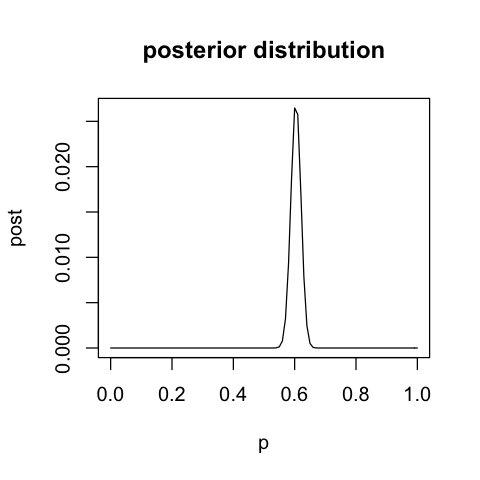

In [14]:
a = 1
b = 1
x = 536
n = 887

p = seq(0, 1, 0.01)
post = posterior(a, b, p, x, n)
options(repr.plot.width = 4, repr.plot.height = 4)
plot(p, post, type = "l", main = "posterior distribution")

* How can we obtain point and interval estimate of p?

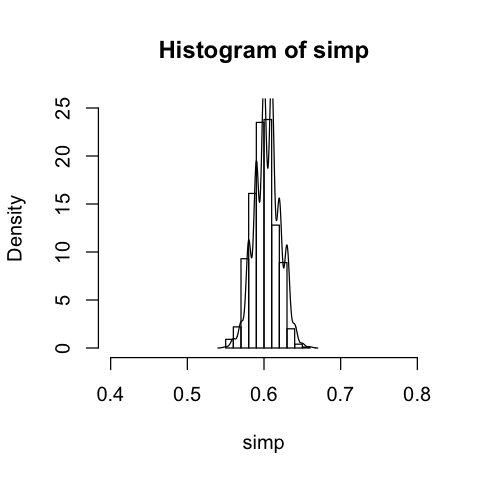

In [31]:
simp = sample(p, 1000, replace = T, prob = post)
hist(simp, freq = F, xlim = c(0.4, 0.8), ylim = c(0, 25))
lines(density(simp))

In [32]:
# point estimate
mean(simp)

[1] 0.60417

In [45]:
# interval estimate
sort(simp)[c(25, 975)]

[1] 0.57 0.63

### Conjugate Prior  

* There's something quite nice about the set up of the previous example
* A Beta prior has the following PDF:  

$$ P(p) = \frac{p^{\alpha - 1} (1 - p)^{\beta - 1}}{B(\alpha, \beta)} $$  

* A Binomial random variable has the following PDF:  

$$ P(x \ | \ p) = \binom{n}{x} p^x (1 - p)^{n - x} $$  

* If we multiply them, we get a Beta distribution again:  

$$ 
\begin{align*} 
\text{posterior} &\propto \text{prior } \times \text{likelihood}   \\ 
&=  \frac{p^{\alpha - 1} (1 - p)^{\beta - 1}}{B(\alpha, \beta)} \times \binom{n}{x} p^x (1 - p)^{n - x} \\
&\propto p^{\alpha - 1} (1 - p)^{\beta - 1} \times p^x (1 - p)^{n - x} \\
&\propto p^{\alpha + x - 1} (1 - p)^{\beta + n - x - 1}
\end{align*} $$

$\Rightarrow \text{posterior } \sim Beta(\alpha + x, \beta + n - x) $  

* When the prior and the posterior belong to the same distribution family, the prior is called the [conjugate prior](https://en.wikipedia.org/wiki/Conjugate_prior) for the likelihood function, e.g. the Beta distribution is a conjugate prior for the Binomial distribution. 

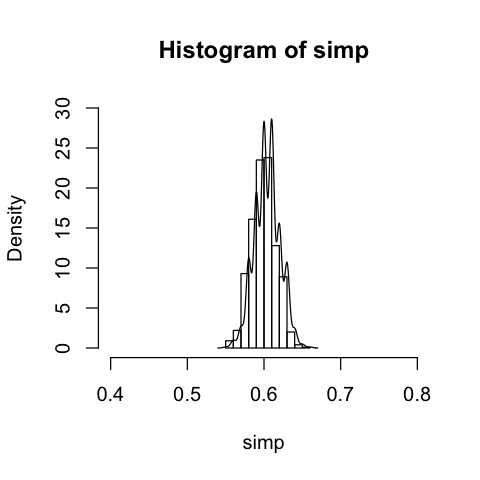

In [40]:
# To obtain the estimates for the previous example
# We can directly simulate data from the known Beta distribution

simp2 = rbeta(1000, 1 + x, 1 + n - x)
hist(simp, freq = F, xlim = c(0.4, 0.8), ylim = c(0, 30))
lines(density(simp))

In [41]:
# point estimate
mean(simp2)

[1] 0.6035283

In [46]:
# interval estimate
sort(simp2)[c(25, 975)]

[1] 0.5727540 0.6345273

### Credible Interval  

* The interval estimate we obtain based on the posterior distribution is called the **credible interval**
* Unlike the frequentist confidence interval, we can interpret the credible interval in terms of probability
* There is a 95% probability/chance that p is between 0.57 and 0.63

In [47]:
# We can also obtain the estimates analytically
# point estimate
(1 + x)/(2 + n)

[1] 0.6040495

In [49]:
# interval estimate
qbeta(c(0.025, 0.975), 1 + x, 1 + n - x)

[1] 0.5717060 0.6359495

### A/B Testing  

* We can use the Bayesian setting to determine probability that version A is better than version B  

**Example**:  

* Let $p$ be the conversion rate (percent of users who view a site who perform the desired action) that we are interested in comparing, e.g. CTR
* Set the priors for $p_A$ and $p_B$ to be Beta(1, 1)
* We observe 463 clicks out of 829 views with version A, and 563 clicks out of 835 views with version B
* We can compare the posterior distributions $P(p_A \ | \ data)$ and $P(p_B \ | \ data)$   

**Q**: What are the posterior distributions for $p_A$ and $p_B$?  

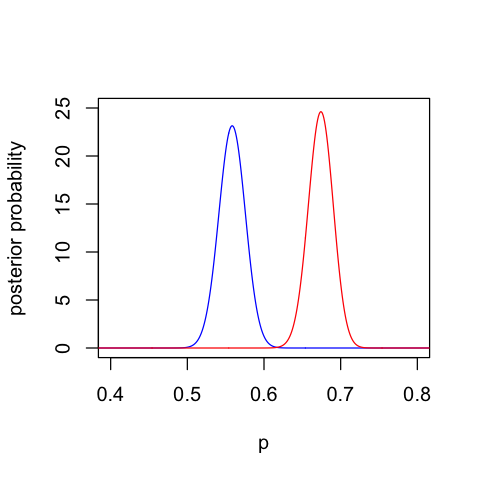

In [61]:
p = seq(0, 1, 0.001)
post_a = dbeta(p , 1 + 463, 1 + 829 - 463)
post_b = dbeta(p , 1 + 563, 1 + 835 - 563)
plot(p, post_a, type = "l", col = "blue", xlim = c(0.4, 0.8), ylim = c(0, 25), ylab = "posterior probability")
lines(p, post_b, col = "red")

* We want to know if this is true:
    * conversion rate of site A > conversion rate of site B
    
* We can also answer if this is true:
    * conversion rate of site A > conversion rate of site B + 5%  



* Method for obtaining $P(p_A > p_B)$
    * Sample a large number of data from both distributions
    * Count the percent of times site A wins

**Exercise**: Find $P(p_A < p_B)$ and $P(p_A + 0.1 < p_B)$.